# Generating a Range curve for LISA

In [2]:
%matplotlib inline
import numpy as np
import pycbc
from matplotlib import pyplot as plt 
from pycbc.waveform import get_td_waveform
from pycbc.waveform import get_fd_waveform
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
import pylab
from pycbc.filter import resample_to_delta_t, highpass
from pycbc.catalog import Merger
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc.detector import Detector

## To import the PSD & ASD of LISA we use: 

In [3]:
!git clone https://github.com/eXtremeGravityInstitute/LISA_Sensitivity
!cp LISA_Sensitivity/* .

Cloning into 'LISA_Sensitivity'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Receiving objects: 100% (59/59), 1005.26 KiB | 3.33 MiB/s, done.
Resolving deltas: 100% (23/23), done.
cp: -r not specified; omitting directory 'LISA_Sensitivity/binder'


https://lisa.nasa.gov/archive2011/Documentation/FTR.pdf

#### LISA specs
fq range of grav waves 0.1-100 $mHz$

strain sensitivity $\frac{\Delta l}{l}$ $10^{-23}$ 


## Importing LISA's PSD/ASD

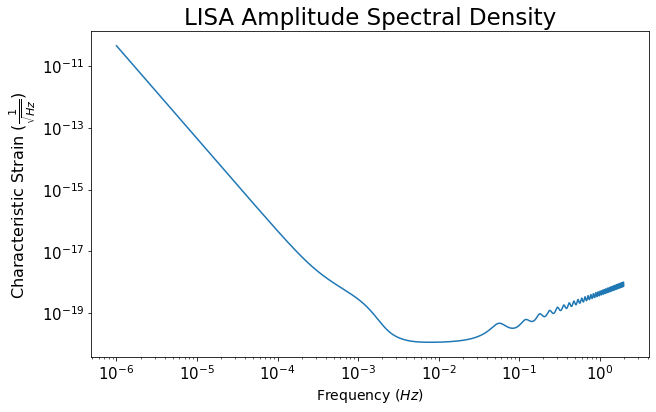

524288
524288


In [6]:
import LISA
lisa = LISA.LISA() 

# Plot LISA's sensitivity curve
f  = np.linspace(1.0e-6, 2.0e0, 2048*256)
Sn = lisa.Sn(f)
plt.figure(figsize=(10,6))
plt.ylabel('Characteristic Strain ($\\frac{1}{\\sqrt{Hz}}$) ', fontsize = 16)
plt.xlabel('Frequency ($Hz$)', fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.title('LISA Amplitude Spectral Density', fontsize= 23)
plt.loglog(figsize=(20,6))
#LISA.PlotSensitivityCurve(f, Sn)
plt.loglog(f, np.sqrt(Sn))
plt.plot(10e-3,10e-17)
plt.show()

psd = np.array([f,Sn]).T
print (len(psd))
np.savetxt("LISA_PSD.txt", psd)

asd = np.array([f,Sn**0.5]).T
print (len(psd))
np.savetxt("LISA_ASD.txt", asd)

To tune duration of a possible wave :

In [10]:
from pycbc.pnutils import get_imr_duration 
get_imr_duration(862550,862550,0,0,0.0001,approximant="IMRPhenomD") ##want length of yr 


array(2579258.67095633)

# Generating the range plot for LISA 
## Assuming equal mass binaries 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycbc.cosmology import redshift
masses=np.arange(1000,150000000,80000)

duration = 3.154e+7 ## duration of day
delt= 20
deltf= 1.0 / duration
tlen= int(1./(delt*deltf))
flen= int(tlen/2 +1)


low_frequency_cutoff = 2e-5
psd = pycbc.psd.from_txt('LISA_PSD.txt', flen, deltf,low_frequency_cutoff,is_asd_file=False)
canonical_snr = 8 ##8
apx="IMRPhenomD" ## approximant
d=100.0 ## distance
out = pycbc.types.zeros(len(psd), dtype=np.complex128)
ranges=[]
rangez=[]
newmasses=[]
imso=[]

#psd = pycbc.psd.from_txt('LISA_PSD.txt', flen, deltf,low_frequency_cutoff,is_asd_file=False)
for m1 in masses:
    htilde= pycbc.waveform.get_waveform_filter(out,
                                         mass1=m1,mass2=m1, approximant=apx,
                                         f_lower=low_frequency_cutoff, delta_f=psd.delta_f,
                                         distance = 1.0)

    htilde = htilde.astype(np.complex128)
    sigma = pycbc.filter.sigma(htilde, psd=psd, low_frequency_cutoff=low_frequency_cutoff)
    horizon_distance = sigma / canonical_snr
    inspiral_range = horizon_distance / 2.26
    ranges.append(inspiral_range)
    rangez.append(redshift(inspiral_range))
    newmasses.append(1/((redshift(inspiral_range)+1)) * m1) ##redshifted masses
    
    
np.savetxt('plot_masses'+ str(canonical_snr) + '.txt', masses)
np.savetxt('plot_masses_redshift'+ str(canonical_snr) + '.txt', newmasses)
np.savetxt('plot_ranges'+ str(canonical_snr) + '.txt', ranges)
np.savetxt('plot_ranges_redshift'+ str(canonical_snr) + '.txt', rangez)

## After generating all that we use, can load to plot

In [2]:
canonical_snr=8
masses8 = np.loadtxt('plot_masses'+ str(canonical_snr) + '.txt')
ranges8= np.loadtxt('plot_ranges'+ str(canonical_snr) + '.txt')
rangez8= np.loadtxt('plot_ranges_redshift'+ str(canonical_snr) + '.txt')
newmasses8= np.loadtxt('plot_ranges_redshift'+ str(canonical_snr) + '.txt')

In [5]:
masses1024= np.loadtxt('plot_masses1024.txt')
ranges1024= np.loadtxt('plot_ranges1024.txt')
rangez1024= np.loadtxt('plot_ranges_redshift1024.txt')
newmasses1024= np.loadtxt('plot_masses_redshift1024.txt')

In [8]:
masses256= np.loadtxt('plot_masses256.txt')
ranges256= np.loadtxt('plot_ranges256.txt')
rangez256= np.loadtxt('plot_ranges_redshift256.txt')
newmasses256= np.loadtxt('plot_masses_redshift256.txt')

In [7]:
masses64= np.loadtxt('plot_masses64.txt')
ranges64= np.loadtxt('plot_ranges64.txt')
rangez64= np.loadtxt('plot_ranges_redshift64.txt')
newmasses64= np.loadtxt('plot_masses_redshift64.txt')

### ISCO frequency Measurements to match plot

In [6]:
import lal
piM = lal.PI * (1e5 + 1e5) * lal.MTSUN_SI
vISCO = 1. / np.sqrt(6.)
fISCO = vISCO * vISCO * vISCO / piM
print(fISCO)

0.021985873455452127


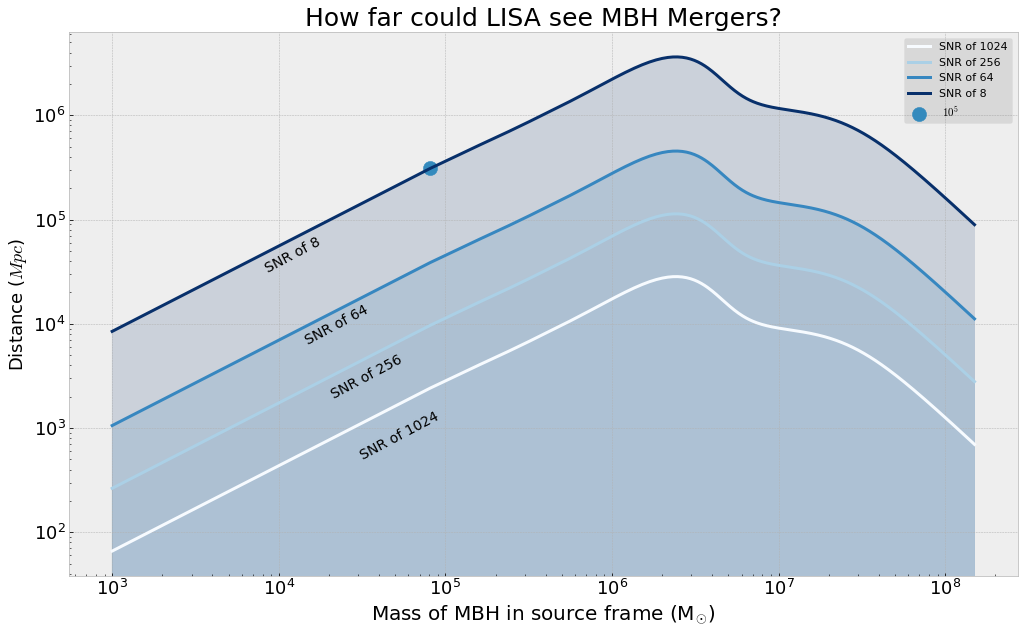

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycbc.cosmology import redshift
from matplotlib import colors
cnames=list(colors.cnames)
from matplotlib import ticker
from matplotlib import cm
plt.style.use('bmh')
masses=np.arange(1000,150000000,80000)
plt.figure(figsize=(17,10))
plt.title("How far could LISA see MBH Mergers?", fontsize = 25)

lines = [ranges1024,ranges256,ranges64,ranges8]
labels= ["SNR of 1024","SNR of 256", "SNR of 64", "SNR of 8"]

colors = [cm.Blues(x) for x in np.linspace(0, 1, len(lines))]
for i, color in enumerate(colors):
    plt.plot(masses,lines[i], color = color,label = labels[i],linewidth=3)
    plt.fill_between(masses,lines[i], color = color, alpha=0.15)

plt.xlabel("Mass of MBH in source frame (M$_{\odot}$)", fontsize=20)
plt.ylabel("Distance ($Mpc$)", fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.text(30000,500,"SNR of 1024",rotation=28,fontsize=14)
plt.text(20000,1900,"SNR of 256",rotation=28,fontsize=14)
plt.text(14000,6300,"SNR of 64",rotation=28,fontsize=14)
plt.text(8000,30800,"SNR of 8",rotation=28,fontsize=14)


# frame = legend.get_frame()
# frame.set_facecolor('gray',framealpha=0.2)
# frame.set_edgecolor('black')
plt.loglog()
plt.scatter(masses[1],ranges8[1],s=200,marker= "o", label = " $10^{5}$")
legend = plt.legend(loc='best',prop={'size': 11},frameon=True,facecolor='gray', framealpha=0.2)

plt.savefig("LISA_Range_plot.png")
plt.show()

# Adding Redshift

In [9]:
canonical_snr = 8
masses8 = np.loadtxt('plot_masses'+ str(canonical_snr) + '.txt')
ranges8= np.loadtxt('plot_ranges'+ str(canonical_snr) + '.txt')
rangez8= np.loadtxt('plot_ranges_redshift'+ str(canonical_snr) + '.txt')
newmasses8= np.loadtxt('plot_ranges_redshift'+ str(canonical_snr) + '.txt')

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.style.use("bmh")
ax2 = ax1.twinx()
ax1.plot(newmasses256, ranges256, 'green',label = 'Mass in Detector frame (Redshifted)',linewidth=1.3)
ax1.plot(masses256,ranges256, 'indigo',alpha=0.8,label='Mass in BH frame')
ax2.plot(masses256, rangez256, 'green',linewidth=1.3, alpha=0, label = '')
#ax2.plot(masses8, ranges8, 'pink',alpha=0.5)
#plt.legend(["Mass in Detector frame (Redshifted)", "Mass in BH frame"],prop={'size': 15})
ax1.legend(loc="best",prop={'size': 15})
ax1.set_xlabel('Mass of BH (Solar Mass)', fontsize = 25)
ax1.set_ylabel('Distance (Mpc)', color='darkblue', fontsize = 25)
ax2.set_ylabel('Redshift', color='firebrick', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=22)
#ax1.set_xscale('log')
ax1.yaxis.offsetText.set_fontsize(18)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    tl.set_fontsize(22)
for tl in ax1.get_xticklabels():
    tl.set_fontsize(22)
for tl in ax2.get_yticklabels():
    tl.set_fontsize(22)
plt.title("How far could LISA see MBH Mergers?", fontsize = 25)


ax1.loglog()
ax2.loglog()
plt.loglog()
plt.show()